# CASE STUDY ON PROBABILITY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Reading data into the environment**

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Summary of dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Checking for missing values**

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset.

**Exploratory Data Analysis**

<AxesSubplot:xlabel='class', ylabel='count'>

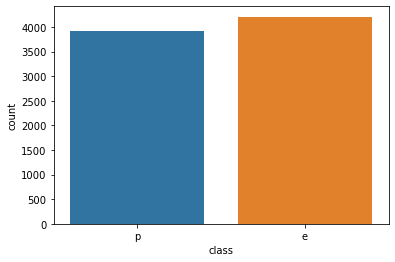

In [6]:
# Countplot of target variable class
sns.countplot(data['class'])

In [7]:
(data['class'].value_counts(normalize = True)*100).round(2)

e    51.8
p    48.2
Name: class, dtype: float64

Out of the 8124 mushrooms studied, 51.8% of mushrooms are edible and 48.2% are poisonous.

<AxesSubplot:xlabel='habitat', ylabel='count'>

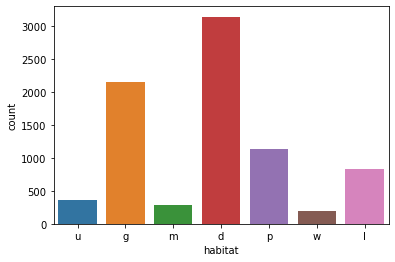

In [8]:
# Countplot of variable habitat
sns.countplot(data['habitat'])

In [9]:
(data['habitat'].value_counts(normalize = True)*100).round(2)

d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64

38.75% of mushrooms are found in woods, while 26.4% are found in grasses. 14.08% and 10.24% are found in paths and leaves respectively.

<AxesSubplot:xlabel='population', ylabel='count'>

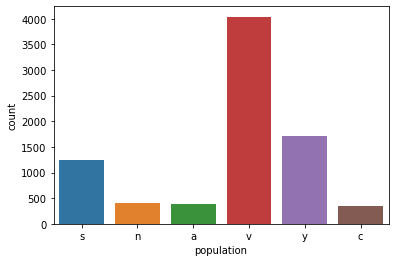

In [10]:
# Countplot of population of mushrooms
sns.countplot(data['population'])

In [11]:
(data['population'].value_counts(normalize = True)*100).round(2)

v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64

Several population of mushrooms make up 49.73%, solitary mushrooms population make 21.07% and scattered mushrooms form 15.36%.

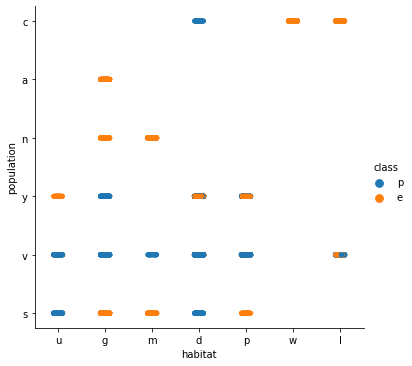

In [12]:
#Categorical plot of habitat and population of mushrooms
sns.catplot('habitat', 'population', hue = 'class', data=data)

**Splitting dataset**

In [13]:
x = data.drop('class', axis = 1)
y = data['class']

One hot Encoding

In [14]:
X = pd.get_dummies(x)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('ytrain shape:', y_train.shape)
print('ytest shape:', y_test.shape)

xtrain shape: (6499, 117)
xtest shape: (1625, 117)
ytrain shape: (6499,)
ytest shape: (1625,)


In [16]:
x_train[:10]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7873,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6515,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6141,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2764,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
438,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5194,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2629,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5976,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4525,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2375,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


**Naive Bayes Algorithm**

In [17]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
model = NaiveBayes.fit(x_train, y_train)
prediction = NaiveBayes.predict(x_test)

In [18]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [19]:
print('Predicted classes:', prediction)

Predicted classes: ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'p'
 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'p' 'p'
 'e' 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'p' 'p' 'p'
 'e' 'p' 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'p' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p'
 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e'
 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'p'
 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'e'
 'p' 'e' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e'
 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p' 'e'
 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'e'
 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e'
 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'p'

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, prediction)) #confusion matrix

[[778  65]
 [  0 782]]


In [21]:
print('Accuracy score:', accuracy_score(y_test, prediction))

Accuracy score: 0.96


Applying Naive Bayes Classifier, we have 65 misclassifications.

**Support Vector Machine**

Linear SVM

In [22]:
from sklearn.svm import SVC

svm_linear = SVC(kernel = 'linear')
model = svm_linear.fit(x_train, y_train)
pred = model.predict(x_test)

In [23]:
print('Accuracy score:', accuracy_score(y_test, pred))

Accuracy score: 1.0


In [24]:
print(confusion_matrix(y_test, pred))

[[843   0]
 [  0 782]]


Radial Basis Function

In [25]:
svm_rbf = SVC(kernel='rbf')
model = svm_rbf.fit(x_train,y_train)
pred = model.predict(x_test)

In [26]:
print('Accuracy score:', accuracy_score(y_test, pred))

Accuracy score: 1.0


In [27]:
print(confusion_matrix(y_test, pred))

[[843   0]
 [  0 782]]


Polynomial SVM

In [28]:
svm_poly = SVC(kernel='poly', degree=3)
model = svm_poly.fit(x_train, y_train)
pred = model.predict(x_test)

In [29]:
print('Accuracy score:', accuracy_score(y_test, pred))

Accuracy score: 1.0


In [30]:
print(confusion_matrix(y_test, pred))

[[843   0]
 [  0 782]]


All 3 types of kernels give zero misclassifications.

**AdaBoost Classifier**

In [31]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

model = abc.fit(x_train, y_train)

prediction = abc.predict(x_test)

In [32]:
print('Predicted classes:', prediction)

Predicted classes: ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p'
 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'p' 'p'
 'e' 'p' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'p' 'p' 'p'
 'e' 'p' 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p'
 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e'
 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'p'
 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e'
 'p' 'e' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e'
 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'e'
 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e'
 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'p'

In [33]:
print(confusion_matrix(y_test, prediction)) #confusion matrix

[[843   0]
 [  0 782]]


In [34]:
print('Accuracy score:', accuracy_score(y_test, prediction))

Accuracy score: 1.0


AdaBoost Classifier accuartely predicts the class with zero misclassifications.